In [66]:
using DifferentialEquations
using Plots

In [67]:
function DDOL_1modules(du,u,p,t)
    
    v0,v1 = u
    bA,n,umax,G,r,D,cA,dA = p
    v_populations = [ v0 , v1 ]
    total_pop = sum( v_populations )

    u_0 = ( umax * G ) / ( 1.0 + ( 0 * bA ) ^ n )
    u_1 = ( umax * G ) / ( 1.0 + ( 1 * bA ) ^ n )

    v0_growth = u_0 * v0 * ( 1.0 - ( total_pop / r ) ) - D * v0
    v1_growth = u_1 * v1 * ( 1.0 - ( total_pop / r ) ) - D * v1
    
    modA = cA * ( v1 )

    v0_conjugation = - ( modA * v0 ) + ( dA * v1 ) 
    v1_conjugation = + ( modA * v0 ) - ( dA * v1 )

    du[1] = dv0 = v0_conjugation + v0_growth
    du[2] = dv1 = v1_conjugation + v1_growth

end

function DDOL_2modules(du,u,p,t)

    v00,v10,v01,v11 = u
    bA,bB,n,umax,G,r,D,cA,cB,dA,dB = p
    v_populations = [ v00 , v10 , v01 , v11 ]
    total_pop = sum( v_populations )
    
    u_00 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB ) ^ n )
    u_10 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB ) ^ n )
    u_01 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB ) ^ n )
    u_11 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB ) ^ n )
    
    v00_growth = u_00 * v00 * ( 1.0 - ( total_pop / r ) ) - D * v00
    v10_growth = u_10 * v10 * ( 1.0 - ( total_pop / r ) ) - D * v10
    v01_growth = u_01 * v01 * ( 1.0 - ( total_pop / r ) ) - D * v01
    v11_growth = u_11 * v11 * ( 1.0 - ( total_pop / r ) ) - D * v11
    
    modA = cA * ( v10 + v11 )
    modB = cB * ( v01 + v11 )
    
    v00_conjugation = ( - ( modA * v00 ) + ( dA * v10 ) 
                        - ( modB * v00 ) + ( dB * v01 ) )
    v10_conjugation = ( + ( modA * v00 ) - ( dA * v10 )
                        - ( modB * v10 ) + ( dB * v11 ) )
    v01_conjugation = ( - ( modA * v01 ) + ( dA * v11 ) 
                        + ( modB * v00 ) - ( dB * v01 ) )  
    v11_conjugation = ( + ( modA * v01 ) - ( dA * v11 ) 
                        + ( modB * v10 ) - ( dB * v11 ) )

    du[1] = dv00 = v00_conjugation + v00_growth
    du[2] = dv10 = v10_conjugation + v10_growth
    du[3] = dv01 = v01_conjugation + v01_growth
    du[4] = dv11 = v11_conjugation + v11_growth
    
end

function DDOL_3modules(du,u,p,t)
    
    v000,v100,v010,v001,v110,v101,v011,v111 = u
    bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC = p
    v_populations = [ v000 , v100 , v010 , v001 , v110 , v101 , v011 , v111 ]
    total_pop = sum( v_populations )
    
    u_000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC ) ^ n )
    u_100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC ) ^ n )
    u_010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC ) ^ n )
    u_001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC ) ^ n )
    u_110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC ) ^ n )
    u_101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC ) ^ n )
    u_011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC ) ^ n )
    u_111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC ) ^ n )

    v000_growth = u_000 * v000 * ( 1.0 - ( total_pop / r ) ) - D * v000
    v100_growth = u_100 * v100 * ( 1.0 - ( total_pop / r ) ) - D * v100
    v010_growth = u_010 * v010 * ( 1.0 - ( total_pop / r ) ) - D * v010
    v001_growth = u_001 * v001 * ( 1.0 - ( total_pop / r ) ) - D * v001
    v110_growth = u_110 * v110 * ( 1.0 - ( total_pop / r ) ) - D * v110
    v101_growth = u_101 * v101 * ( 1.0 - ( total_pop / r ) ) - D * v101
    v011_growth = u_011 * v011 * ( 1.0 - ( total_pop / r ) ) - D * v011
    v111_growth = u_111 * v111 * ( 1.0 - ( total_pop / r ) ) - D * v111   
    
    modA = cA * ( v100 + v110 + v101 + v111)
    modB = cB * ( v010 + v110 + v011 + v111)
    modC = cC * ( v001 + v011 + v101 + v111)
    
    v000_conjugation = ( - ( modA * v000 ) + ( dA * v100 )  
                         - ( modB * v000 ) + ( dB * v010 )  
                         - ( modC * v000 ) + ( dC * v001 ) )
    v100_conjugation = ( + ( modA * v000 ) - ( dA * v100 )  
                         - ( modB * v100 ) + ( dB * v110 )  
                         - ( modC * v100 ) + ( dC * v101 ) )
    v010_conjugation = ( - ( modA * v010 ) + ( dA * v110 )  
                         + ( modB * v000 ) - ( dB * v010 )  
                         - ( modC * v010 ) + ( dC * v011 ) )
    v001_conjugation = ( - ( modA * v001 ) + ( dA * v101 )  
                         - ( modB * v001 ) + ( dB * v011 )  
                         + ( modC * v000 ) - ( dC * v001 ) )
    v110_conjugation = ( + ( modA * v010 ) - ( dA * v110 )  
                         + ( modB * v100 ) - ( dB * v110 )  
                         - ( modC * v110 ) + ( dC * v111 ) )
    v101_conjugation = ( + ( modA * v001 ) - ( dA * v101 )  
                         - ( modB * v101 ) + ( dB * v111 )  
                         + ( modC * v100 ) - ( dC * v101 ) )
    v011_conjugation = ( - ( modA * v011 ) + ( dA * v111 )  
                         + ( modB * v001 ) - ( dB * v011 )  
                         + ( modC * v010 ) - ( dC * v011 ) )
    v111_conjugation = ( + ( modA * v011 ) - ( dA * v111 )  
                         + ( modB * v101 ) - ( dB * v111 )  
                         + ( modC * v110 ) - ( dC * v111 ) )
    
    du[1] = dv000 = v000_conjugation + v000_growth
    du[2] = dv100 = v100_conjugation + v100_growth
    du[3] = dv010 = v010_conjugation + v010_growth
    du[4] = dv001 = v001_conjugation + v001_growth
    du[5] = dv110 = v110_conjugation + v110_growth
    du[6] = dv101 = v101_conjugation + v101_growth
    du[7] = dv011 = v011_conjugation + v011_growth
    du[8] = dv111 = v111_conjugation + v111_growth
    
end

function DDOL_4modules(du,u,p,t)
    
    v0000,v1000,v0100,v0010,v0001,v1100,v0110,v0011,v0101,v1010,v1001,v0111,v1011,v1101,v1110,v1111 = u
    bA,bB,bC,bD,n,umax,G,r,D,cA,cB,cC,cD,dA,dB,dC,dD = p
    v_populations = [ v0000 , v1000 , v0100 , v0010 , v0001 , v1100 , v0110 , v0011 , v0101 , v1010 , v1001 , v0111 , v1011 , v1101 , v1110 , v1111 ]
    total_pop = sum( v_populations )

    u_0000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD ) ^ n )
    u_1000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD ) ^ n )
    u_0100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD ) ^ n )
    u_0010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD ) ^ n )
    u_0001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD ) ^ n )
    u_1100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD ) ^ n )
    u_0110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD ) ^ n )
    u_0011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD ) ^ n )
    u_0101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD ) ^ n )
    u_1010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD ) ^ n )
    u_1001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD ) ^ n )
    u_0111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD ) ^ n )
    u_1011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD ) ^ n )
    u_1101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD ) ^ n )
    u_1110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD ) ^ n )
    u_1111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD ) ^ n )

    v0000_growth = u_0000 * v0000 * ( 1.0 - ( total_pop / r ) ) - D * v0000
    v1000_growth = u_1000 * v1000 * ( 1.0 - ( total_pop / r ) ) - D * v1000
    v0100_growth = u_0100 * v0100 * ( 1.0 - ( total_pop / r ) ) - D * v0100
    v0010_growth = u_0010 * v0010 * ( 1.0 - ( total_pop / r ) ) - D * v0010
    v0001_growth = u_0001 * v0001 * ( 1.0 - ( total_pop / r ) ) - D * v0001
    v1100_growth = u_1100 * v1100 * ( 1.0 - ( total_pop / r ) ) - D * v1100
    v0110_growth = u_0110 * v0110 * ( 1.0 - ( total_pop / r ) ) - D * v0110
    v0011_growth = u_0011 * v0011 * ( 1.0 - ( total_pop / r ) ) - D * v0011
    v0101_growth = u_0101 * v0101 * ( 1.0 - ( total_pop / r ) ) - D * v0101
    v1010_growth = u_1010 * v1010 * ( 1.0 - ( total_pop / r ) ) - D * v1010
    v1001_growth = u_1001 * v1001 * ( 1.0 - ( total_pop / r ) ) - D * v1001
    v0111_growth = u_0111 * v0111 * ( 1.0 - ( total_pop / r ) ) - D * v0111
    v1011_growth = u_1011 * v1011 * ( 1.0 - ( total_pop / r ) ) - D * v1011
    v1101_growth = u_1101 * v1101 * ( 1.0 - ( total_pop / r ) ) - D * v1101
    v1110_growth = u_1110 * v1110 * ( 1.0 - ( total_pop / r ) ) - D * v1110
    v1111_growth = u_1111 * v1111 * ( 1.0 - ( total_pop / r ) ) - D * v1111
    
    modA = cA * ( v1000 + v1100 + v1010 + v1001 + v1011 + v1101 + v1110 + v1111 ) 
    modB = cB * ( v0100 + v1100 + v0110 + v0101 + v0111 + v1101 + v1110 + v1111 ) 
    modC = cC * ( v0010 + v0011 + v0110 + v1010 + v0111 + v1011 + v1110 + v1111 ) 
    modD = cD * ( v0001 + v0011 + v1001 + v0101 + v1101 + v1011 + v0111 + v1111 ) 
    
    v0000_conjugation = ( - ( modA * v0000 ) + ( dA * v1000 )  
                          - ( modB * v0000 ) + ( dB * v0100 )  
                          - ( modC * v0000 ) + ( dC * v0010 )  
                          - ( modD * v0000 ) + ( dD * v0001 ) )
    v1000_conjugation = ( + ( modA * v0000 ) - ( dA * v1000 )  
                          - ( modB * v1000 ) + ( dB * v1100 )  
                          - ( modC * v1000 ) + ( dC * v1010 )  
                          - ( modD * v1000 ) + ( dD * v1001 ) )
    v0100_conjugation = ( - ( modA * v0100 ) + ( dA * v1100 )  
                          + ( modB * v0000 ) - ( dB * v0100 )  
                          - ( modC * v0100 ) + ( dC * v0110 )  
                          - ( modD * v0100 ) + ( dD * v0101 ) )
    v0010_conjugation = ( - ( modA * v0010 ) + ( dA * v1010 )  
                          - ( modB * v0010 ) + ( dB * v0110 )  
                          + ( modC * v0000 ) - ( dC * v0010 )  
                          - ( modD * v0010 ) + ( dD * v0011 ) )
    v0001_conjugation = ( - ( modA * v0001 ) + ( dA * v1001 )  
                          - ( modB * v0001 ) + ( dB * v0101 )  
                          - ( modC * v0001 ) + ( dC * v0011 )  
                          + ( modD * v0000 ) - ( dD * v0001 ) )
    v1100_conjugation = ( + ( modA * v0100 ) - ( dA * v1100 )  
                          + ( modB * v1000 ) - ( dB * v1100 )  
                          - ( modC * v1100 ) + ( dC * v1110 )  
                          - ( modD * v1100 ) + ( dD * v1101 ) )
    v0110_conjugation = ( - ( modA * v0110 ) + ( dA * v1110 )  
                          + ( modB * v0010 ) - ( dB * v0110 )  
                          + ( modC * v0100 ) - ( dC * v0110 )  
                          - ( modD * v0110 ) + ( dD * v0111 ) )
    v0011_conjugation = ( - ( modA * v0011 ) + ( dA * v1011 )  
                          - ( modB * v0011 ) + ( dB * v0111 )  
                          + ( modC * v0001 ) - ( dC * v0011 )  
                          + ( modD * v0010 ) - ( dD * v0011 ) )
    v0101_conjugation = ( - ( modA * v0101 ) + ( dA * v1101 )  
                          + ( modB * v0001 ) - ( dB * v0101 )  
                          - ( modC * v0101 ) + ( dC * v0111 )  
                          + ( modD * v0100 ) - ( dD * v0101 ) )
    v1010_conjugation = ( + ( modA * v0010 ) - ( dA * v1010 )  
                          - ( modB * v1010 ) + ( dB * v1110 )  
                          + ( modC * v1000 ) - ( dC * v1010 )  
                          - ( modD * v1010 ) + ( dD * v1011 ) )
    v1001_conjugation = ( + ( modA * v0001 ) - ( dA * v1001 )  
                          - ( modB * v1001 ) + ( dB * v1101 )  
                          - ( modC * v1001 ) + ( dC * v1011 )  
                          + ( modD * v1000 ) - ( dD * v1001 ) )
    v0111_conjugation = ( - ( modA * v0111 ) + ( dA * v1111 )  
                          + ( modB * v0011 ) - ( dB * v0111 )  
                          + ( modC * v0101 ) - ( dC * v0111 )  
                          + ( modD * v0110 ) - ( dD * v0111 ) )
    v1011_conjugation = ( + ( modA * v0011 ) - ( dA * v1011 )  
                          - ( modB * v1011 ) + ( dB * v1111 )  
                          + ( modC * v1001 ) - ( dC * v1011 )  
                          + ( modD * v1010 ) - ( dD * v1011 ) )
    v1101_conjugation = ( + ( modA * v0101 ) - ( dA * v1101 )  
                          + ( modB * v1001 ) - ( dB * v1101 )  
                          - ( modC * v1101 ) + ( dC * v1111 )  
                          + ( modD * v1100 ) - ( dD * v1101 ) )
    v1110_conjugation = ( + ( modA * v0110 ) - ( dA * v1110 )  
                          + ( modB * v1010 ) - ( dB * v1110 )  
                          + ( modC * v1100 ) - ( dC * v1110 )  
                          - ( modD * v1110 ) + ( dD * v1111 ) )
    v1111_conjugation = ( + ( modA * v0111 ) - ( dA * v1111 )  
                          + ( modB * v1011 ) - ( dB * v1111 )  
                          + ( modC * v1101 ) - ( dC * v1111 )  
                          + ( modD * v1110 ) - ( dD * v1111 ) )

    du[1] = v0000_conjugation + v0000_growth
    du[2] = v1000_conjugation + v1000_growth
    du[3] = v0100_conjugation + v0100_growth
    du[4] = v0010_conjugation + v0010_growth
    du[5] = v0001_conjugation + v0001_growth
    du[6] = v1100_conjugation + v1100_growth
    du[7] = v0110_conjugation + v0110_growth
    du[8] = v0011_conjugation + v0011_growth
    du[9] = v0101_conjugation + v0101_growth
    du[10] = v1010_conjugation + v1010_growth
    du[11] = v1001_conjugation + v1001_growth
    du[12] = v0111_conjugation + v0111_growth
    du[13] = v1011_conjugation + v1011_growth
    du[14] = v1101_conjugation + v1101_growth
    du[15] = v1110_conjugation + v1110_growth
    du[16] = v1111_conjugation + v1111_growth
    
end

function DDOL_5modules(du,u,p,t)

    v00000,v10000,v01000,v00100,v00010,v00001,v11000,v01100,v00110,v00011,v10100,v10010,v10001,v01001,v00101,v01010,v11001,v11100,v01011,v01101,v01110,v10110,v11010,v10101,v00111,v10011,v11110,v11101,v11011,v10111,v01111,v11111 = u
    bA,bB,bC,bD,bE,n,umax,G,r,D,cA,cB,cC,cD,cE,dA,dB,dC,dD,dE = p
    v_populations = [ v00000 , v10000 , v01000 , v00100 , v00010 , v00001 , v11000 , v01100 , v00110 , v00011 , v10100 , v10010 , v10001 , v01001 , v00101 , v01010 , v11001 , v11100 , v01011 , v01101 , v01110 , v10110 , v11010 , v10101 , v00111 , v10011 , v11110 , v11101 , v11011 , v10111 , v01111 , v11111 ]
    total_pop = sum( v_populations )
    
    u_00000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD + 0 * bE ) ^ n )
    u_10000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD + 0 * bE ) ^ n )
    u_01000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD + 0 * bE ) ^ n )
    u_00100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD + 0 * bE ) ^ n )
    u_00010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD + 0 * bE ) ^ n )
    u_00001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD + 1 * bE ) ^ n )
    u_11000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD + 0 * bE ) ^ n )
    u_01100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD + 0 * bE ) ^ n )
    u_00110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD + 0 * bE ) ^ n )
    u_00011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD + 1 * bE ) ^ n )
    u_10100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD + 0 * bE ) ^ n )
    u_10010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD + 0 * bE ) ^ n )
    u_10001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD + 1 * bE ) ^ n )
    u_01001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD + 1 * bE ) ^ n )
    u_00101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD + 1 * bE ) ^ n )
    u_01010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD + 0 * bE ) ^ n )
    u_11001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD + 1 * bE ) ^ n )
    u_11100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD + 0 * bE ) ^ n )
    u_01011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD + 1 * bE ) ^ n )
    u_01101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD + 1 * bE ) ^ n )
    u_01110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD + 0 * bE ) ^ n )
    u_10110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD + 0 * bE ) ^ n )
    u_11010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD + 0 * bE ) ^ n )
    u_10101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD + 1 * bE ) ^ n )
    u_00111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD + 1 * bE ) ^ n )
    u_10011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD + 1 * bE ) ^ n )
    u_11110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD + 0 * bE ) ^ n )
    u_11101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD + 1 * bE ) ^ n )
    u_11011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD + 1 * bE ) ^ n )
    u_10111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD + 1 * bE ) ^ n )
    u_01111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD + 1 * bE ) ^ n )
    u_11111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD + 1 * bE ) ^ n )
    
    v00000_growth = u_00000 * v00000 * ( 1.0 - ( total_pop / r ) ) - D * v00000
    v10000_growth = u_10000 * v10000 * ( 1.0 - ( total_pop / r ) ) - D * v10000
    v01000_growth = u_01000 * v01000 * ( 1.0 - ( total_pop / r ) ) - D * v01000
    v00100_growth = u_00100 * v00100 * ( 1.0 - ( total_pop / r ) ) - D * v00100
    v00010_growth = u_00010 * v00010 * ( 1.0 - ( total_pop / r ) ) - D * v00010
    v00001_growth = u_00001 * v00001 * ( 1.0 - ( total_pop / r ) ) - D * v00001
    v11000_growth = u_11000 * v11000 * ( 1.0 - ( total_pop / r ) ) - D * v11000
    v01100_growth = u_01100 * v01100 * ( 1.0 - ( total_pop / r ) ) - D * v01100
    v00110_growth = u_00110 * v00110 * ( 1.0 - ( total_pop / r ) ) - D * v00110
    v00011_growth = u_00011 * v00011 * ( 1.0 - ( total_pop / r ) ) - D * v00011
    v10100_growth = u_10100 * v10100 * ( 1.0 - ( total_pop / r ) ) - D * v10100
    v10010_growth = u_10010 * v10010 * ( 1.0 - ( total_pop / r ) ) - D * v10010
    v10001_growth = u_10001 * v10001 * ( 1.0 - ( total_pop / r ) ) - D * v10001
    v01001_growth = u_01001 * v01001 * ( 1.0 - ( total_pop / r ) ) - D * v01001
    v00101_growth = u_00101 * v00101 * ( 1.0 - ( total_pop / r ) ) - D * v00101
    v01010_growth = u_01010 * v01010 * ( 1.0 - ( total_pop / r ) ) - D * v01010
    v11001_growth = u_11001 * v11001 * ( 1.0 - ( total_pop / r ) ) - D * v11001
    v11100_growth = u_11100 * v11100 * ( 1.0 - ( total_pop / r ) ) - D * v11100
    v01011_growth = u_01011 * v01011 * ( 1.0 - ( total_pop / r ) ) - D * v01011
    v01101_growth = u_01101 * v01101 * ( 1.0 - ( total_pop / r ) ) - D * v01101
    v01110_growth = u_01110 * v01110 * ( 1.0 - ( total_pop / r ) ) - D * v01110
    v10110_growth = u_10110 * v10110 * ( 1.0 - ( total_pop / r ) ) - D * v10110
    v11010_growth = u_11010 * v11010 * ( 1.0 - ( total_pop / r ) ) - D * v11010
    v10101_growth = u_10101 * v10101 * ( 1.0 - ( total_pop / r ) ) - D * v10101
    v00111_growth = u_00111 * v00111 * ( 1.0 - ( total_pop / r ) ) - D * v00111
    v10011_growth = u_10011 * v10011 * ( 1.0 - ( total_pop / r ) ) - D * v10011
    v11110_growth = u_11110 * v11110 * ( 1.0 - ( total_pop / r ) ) - D * v11110
    v11101_growth = u_11101 * v11101 * ( 1.0 - ( total_pop / r ) ) - D * v11101
    v11011_growth = u_11011 * v11011 * ( 1.0 - ( total_pop / r ) ) - D * v11011
    v10111_growth = u_10111 * v10111 * ( 1.0 - ( total_pop / r ) ) - D * v10111
    v01111_growth = u_01111 * v01111 * ( 1.0 - ( total_pop / r ) ) - D * v01111
    v11111_growth = u_11111 * v11111 * ( 1.0 - ( total_pop / r ) ) - D * v11111
    
    modA = cA * ( v10000 + v11000 + v10100 + v10010 + v10001 + v11100 + v10110 + v10011 + v10101 + v11010 + v11001 + v10111 + v11011 + v11101 + v11110 + v11111 )
    modB = cB * ( v01000 + v11000 + v01100 + v01010 + v01001 + v11100 + v01110 + v01011 + v01101 + v11010 + v11001 + v01111 + v11011 + v11101 + v11110 + v11111 )
    modC = cC * ( v00100 + v10100 + v01100 + v00110 + v00101 + v11100 + v01110 + v00111 + v01101 + v10110 + v10101 + v01111 + v10111 + v11101 + v11110 + v11111 )
    modD = cD * ( v00010 + v10010 + v01010 + v00110 + v00011 + v11010 + v01110 + v00111 + v01011 + v10110 + v10011 + v01111 + v10111 + v11011 + v11110 + v11111 )
    modE = cE * ( v00001 + v10001 + v01001 + v00101 + v00011 + v11001 + v01101 + v00111 + v01011 + v10101 + v10011 + v01111 + v10111 + v11011 + v11101 + v11111 )
    
    v00000_conjugation = ( - ( modA * v00000 ) + ( dA * v10000 )  
                           - ( modB * v00000 ) + ( dB * v01000 )  
                           - ( modC * v00000 ) + ( dC * v00100 )  
                           - ( modD * v00000 ) + ( dD * v00010 ) 
                           - ( modE * v00000 ) + ( dE * v00001 ) )
    v10000_conjugation = ( + ( modA * v00000 ) - ( dA * v10000 )  
                           - ( modB * v10000 ) + ( dB * v11000 )  
                           - ( modC * v10000 ) + ( dC * v10100 )  
                           - ( modD * v10000 ) + ( dD * v10010 ) 
                           - ( modE * v10000 ) + ( dE * v10001 ) )
    v01000_conjugation = ( - ( modA * v01000 ) + ( dA * v11000 )  
                           + ( modB * v00000 ) - ( dB * v01000 )  
                           - ( modC * v01000 ) + ( dC * v01100 )  
                           - ( modD * v01000 ) + ( dD * v01010 ) 
                           - ( modE * v01000 ) + ( dE * v01001 ) )
    v00100_conjugation = ( - ( modA * v00100 ) + ( dA * v10100 )  
                           - ( modB * v00100 ) + ( dB * v01100 )  
                           + ( modC * v00000 ) - ( dC * v00100 )  
                           - ( modD * v00100 ) + ( dD * v01010 ) 
                           - ( modE * v00100 ) + ( dE * v01001 ) )
    v00010_conjugation = ( - ( modA * v00010 ) + ( dA * v10010 )  
                           - ( modB * v00010 ) + ( dB * v01010 )  
                           - ( modC * v00010 ) + ( dC * v00110 )  
                           + ( modD * v00000 ) - ( dD * v00010 ) 
                           - ( modE * v00010 ) + ( dE * v00011 ) )
    v00001_conjugation = ( - ( modA * v00001 ) + ( dA * v10001 )  
                           - ( modB * v00001 ) + ( dB * v01001 )  
                           - ( modC * v00001 ) + ( dC * v00101 )  
                           - ( modD * v00001 ) + ( dD * v00011 ) 
                           + ( modE * v00000 ) - ( dE * v00001 ) )
    v11000_conjugation = ( + ( modA * v01000 ) - ( dA * v11000 )  
                           + ( modB * v10000 ) - ( dB * v11000 )  
                           - ( modC * v11000 ) + ( dC * v11100 )  
                           - ( modD * v11000 ) + ( dD * v11010 ) 
                           - ( modE * v11000 ) + ( dE * v11001 ) )
    v01100_conjugation = ( - ( modA * v01100 ) + ( dA * v11100 )  
                           + ( modB * v00100 ) - ( dB *v01100  )  
                           + ( modC * v01000 ) - ( dC * v01100 )  
                           - ( modD * v01100 ) + ( dD * v01110 ) 
                           - ( modE * v01100 ) + ( dE * v01101 ) )
    v00110_conjugation = ( - ( modA * v00110 ) + ( dA * v10110 )  
                           - ( modB * v00110 ) + ( dB * v01110 )  
                           + ( modC * v00010 ) - ( dC * v00110 )  
                           + ( modD * v00100 ) - ( dD * v00110 ) 
                           - ( modE * v00110 ) + ( dE * v00111 ) )
    v00011_conjugation = ( - ( modA * v00011 ) + ( dA * v10011 )  
                           - ( modB * v00011 ) + ( dB * v01011 )  
                           - ( modC * v00011 ) + ( dC * v00111 )  
                           + ( modD * v00001 ) - ( dD * v00011 ) 
                           + ( modE * v00010 ) - ( dE * v00011 ) )
    v10100_conjugation = ( + ( modA * v00100 ) - ( dA * v10100 )  
                           - ( modB * v10100 ) + ( dB * v11100 )  
                           + ( modC * v10000 ) - ( dC * v10100 )  
                           - ( modD * v10100 ) + ( dD * v10110 ) 
                           - ( modE * v10100 ) + ( dE * v10101 ) )
    v10010_conjugation = ( + ( modA * v00010 ) - ( dA * v10010 )  
                           - ( modB * v10010 ) + ( dB * v11010 )  
                           - ( modC * v10010 ) + ( dC * v10110 )  
                           + ( modD * v10000 ) - ( dD * v10010 ) 
                           - ( modE * v10010 ) + ( dE * v10011 ) )
    v10001_conjugation = ( + ( modA * v00001 ) - ( dA * v10001 )  
                           - ( modB * v10001 ) + ( dB * v11001 )  
                           - ( modC * v10001 ) + ( dC * v10101 )  
                           - ( modD * v10001 ) + ( dD * v10011 ) 
                           + ( modE * v10000 ) - ( dE * v10001 ) )
    v01001_conjugation = ( - ( modA * v01001 ) + ( dA * v11001 )  
                           + ( modB * v00001 ) - ( dB * v01001 )  
                           - ( modC * v01001 ) + ( dC * v01101 )  
                           - ( modD * v01001 ) + ( dD * v01011 ) 
                           + ( modE * v01000 ) - ( dE * v01001 ) )
    v00101_conjugation = ( - ( modA * v00101 ) + ( dA * v10101 )  
                           - ( modB * v00101 ) + ( dB * v01101 )  
                           + ( modC * v00001 ) - ( dC * v00101 )  
                           - ( modD * v00101 ) + ( dD * v00111 ) 
                           + ( modE * v00100 ) - ( dE * v00101 ) )
    v01010_conjugation = ( - ( modA * v01010 ) + ( dA * v11010 )  
                           + ( modB * v00010 ) - ( dB * v01010 )  
                           - ( modC * v01010 ) + ( dC * v01110 )  
                           + ( modD * v01000 ) - ( dD * v01010 ) 
                           - ( modE * v01010 ) + ( dE * v01011 ) )
    v11001_conjugation = ( + ( modA * v01001 ) - ( dA * v11001 )  
                           + ( modB * v10001 ) - ( dB * v11001 )  
                           - ( modC * v11001 ) + ( dC * v11101 )  
                           - ( modD * v11001 ) + ( dD * v11011 ) 
                           + ( modE * v11000 ) - ( dE * v11001 ) )
    v11100_conjugation = ( + ( modA * v01100 ) - ( dA * v11100 )  
                           + ( modB * v10100 ) - ( dB * v11100 )  
                           + ( modC * v11000 ) - ( dC * v11100 )  
                           - ( modD * v11100 ) + ( dD * v11110 ) 
                           - ( modE * v11100 ) + ( dE * v11101 ) )
    v01011_conjugation = ( - ( modA * v01011 ) + ( dA * v11011 )  
                           + ( modB * v00011 ) - ( dB * v01011 )  
                           - ( modC * v01011 ) + ( dC * v01111 )  
                           + ( modD * v01001 ) - ( dD * v01011 ) 
                           + ( modE * v01010 ) - ( dE * v01011 ) )
    v01101_conjugation = ( - ( modA * v01101 ) + ( dA * v11101 )  
                           + ( modB * v00101 ) - ( dB * v01101 )  
                           + ( modC * v01001 ) - ( dC * v01101 )  
                           - ( modD * v01101 ) + ( dD * v01111 ) 
                           + ( modE * v01100 ) - ( dE * v01101 ) )
    v01110_conjugation = ( - ( modA * v01110 ) + ( dA * v11110 )  
                           + ( modB * v00110 ) - ( dB * v01110 )  
                           + ( modC * v01010 ) - ( dC * v01110 )  
                           + ( modD * v01100 ) - ( dD * v01110 ) 
                           - ( modE * v01110 ) + ( dE * v01111 ) )
    v10110_conjugation = ( + ( modA * v00110 ) - ( dA * v10110 )  
                           - ( modB * v10110 ) + ( dB * v11110 )  
                           + ( modC * v10010 ) - ( dC * v10110 )  
                           + ( modD * v10100 ) - ( dD * v10110 ) 
                           - ( modE * v10110 ) + ( dE * v10111 ) )
    v11010_conjugation = ( + ( modA * v01010 ) - ( dA * v11010 )  
                           + ( modB * v10010 ) - ( dB * v11010 )  
                           - ( modC * v11010 ) + ( dC * v11110 )  
                           + ( modD * v11000 ) - ( dD * v11010 ) 
                           - ( modE * v11010 ) + ( dE * v11011 ) )
    v10101_conjugation = ( + ( modA * v00101 ) - ( dA * v10101 )  
                           - ( modB * v10101 ) + ( dB * v11101 )  
                           + ( modC * v10001 ) - ( dC * v10101 )  
                           - ( modD * v10101 ) + ( dD * v10111 ) 
                           + ( modE * v10100 ) - ( dE * v10101 ) )
    v00111_conjugation = ( - ( modA * v00111 ) + ( dA * v10111 )  
                           - ( modB * v00111 ) + ( dB * v01111 )  
                           + ( modC * v00011 ) - ( dC * v00111 )  
                           + ( modD * v00101 ) - ( dD * v00111 ) 
                           + ( modE * v00110 ) - ( dE * v00111 ) )
    v10011_conjugation = ( + ( modA * v00011 ) - ( dA * v10011 )  
                           - ( modB * v10011 ) + ( dB * v11011 )  
                           - ( modC * v10011 ) + ( dC * v10111 )  
                           + ( modD * v10001 ) - ( dD * v10011 ) 
                           + ( modE * v10010 ) - ( dE * v10011 ) )
    v11110_conjugation = ( + ( modA * v01110 ) - ( dA * v11110 )  
                           + ( modB * v10110 ) - ( dB * v11110 )  
                           + ( modC * v11010 ) - ( dC * v11110 )  
                           + ( modD * v11100 ) - ( dD * v11110 ) 
                           - ( modE * v11110 ) + ( dE * v11111 ) )
    v11101_conjugation = ( + ( modA * v01101 ) - ( dA * v11101 )  
                           + ( modB * v10101 ) - ( dB * v11101 )  
                           + ( modC * v11001 ) - ( dC * v11101 )  
                           - ( modD * v11101 ) + ( dD * v11111 ) 
                           + ( modE * v11100 ) - ( dE * v11101 ) )
    v11011_conjugation = ( + ( modA * v01011 ) - ( dA * v11011 )  
                           + ( modB * v10011 ) - ( dB * v11011 )  
                           - ( modC * v11011 ) + ( dC * v11111 )  
                           + ( modD * v11001 ) - ( dD * v11011 ) 
                           + ( modE * v11010 ) - ( dE * v11011 ) )
    v10111_conjugation = ( + ( modA * v00111 ) - ( dA * v10111 )  
                           - ( modB * v10111 ) + ( dB * v11111 )  
                           + ( modC * v10011 ) - ( dC * v10111 )  
                           + ( modD * v10101 ) - ( dD * v10111 ) 
                           + ( modE * v10110 ) - ( dE * v10111 ) )
    v01111_conjugation = ( - ( modA * v01111 ) + ( dA * v11111 )  
                           + ( modB * v00111 ) - ( dB * v01111 )  
                           + ( modC * v01011 ) - ( dC * v01111 )  
                           + ( modD * v01101 ) - ( dD * v01111 ) 
                           + ( modE * v01110 ) - ( dE * v01111 ) )
    v11111_conjugation = ( + ( modA * v01111 ) - ( dA * v11111 )  
                           + ( modB * v10111 ) - ( dB * v11111 )  
                           + ( modC * v11011 ) - ( dC * v11111 )  
                           + ( modD * v11101 ) - ( dD * v11111 ) 
                           + ( modE * v11110 ) - ( dE * v11111 ) )
    
    du[1] = v00000_conjugation + v00000_growth
    du[2] = v10000_conjugation + v10000_growth
    du[3] = v01000_conjugation + v01000_growth
    du[4] = v00100_conjugation + v00100_growth
    du[5] = v00010_conjugation + v00010_growth
    du[6] = v00001_conjugation + v00001_growth
    du[7] = v11000_conjugation + v11000_growth
    du[8] = v01100_conjugation + v01100_growth
    du[9] = v00110_conjugation + v00110_growth
    du[10] = v00011_conjugation + v00011_growth
    du[11] = v10100_conjugation + v10100_growth
    du[12] = v10010_conjugation + v10010_growth
    du[13] = v10001_conjugation + v10001_growth
    du[14] = v01001_conjugation + v01001_growth
    du[15] = v00101_conjugation + v00101_growth
    du[16] = v01010_conjugation + v01010_growth
    du[17] = v11001_conjugation + v11001_growth
    du[18] = v11100_conjugation + v11100_growth
    du[19] = v01011_conjugation + v01011_growth
    du[20] = v01101_conjugation + v01101_growth
    du[21] = v01110_conjugation + v01110_growth
    du[22] = v10110_conjugation + v10110_growth
    du[23] = v11010_conjugation + v11010_growth
    du[24] = v10101_conjugation + v10101_growth
    du[25] = v00111_conjugation + v00111_growth
    du[26] = v10011_conjugation + v10011_growth
    du[27] = v11110_conjugation + v11110_growth
    du[28] = v11101_conjugation + v11101_growth
    du[29] = v11011_conjugation + v11011_growth
    du[30] = v10111_conjugation + v10111_growth
    du[31] = v01111_conjugation + v01111_growth
    du[32] = v11111_conjugation + v11111_growth

end

function DDOL_6modules(du,u,p,t)

    v100000,v110000,v101000,v100100,v100010,v100001,v111000,v101100,v100110,v100011,v110100,v110010,v110001,v101001,v100101,v101010,v111001,v111100,v101011,v101101,v101110,v110110,v111010,v110101,v100111,v110011,v111110,v111101,v111011,v110111,v101111,v111111,v000000,v010000,v001000,v000100,v000010,v000001,v011000,v001100,v000110,v000011,v010100,v010010,v010001,v001001,v000101,v001010,v011001,v011100,v001011,v001101,v001110,v010110,v011010,v010101,v000111,v010011,v011110,v011101,v011011,v010111,v001111,v011111 = u
    bA,bB,bC,bD,bE,bF,n,umax,G,r,D,cA,cB,cC,cD,cE,cF,dA,dB,dC,dD,dE,dF = p
    v_populations = [v100000 , v110000 , v101000 , v100100 , v100010 , v100001 , v111000 , v101100 , v100110 , v100011 , v110100 , v110010 , v110001 , v101001 , v100101 , v101010 , v111001 , v111100 , v101011 , v101101 , v101110 , v110110 , v111010 , v110101 , v100111 , v110011 , v111110 , v111101 , v111011 , v110111 , v101111 , v111111 , v000000 , v010000 , v001000 , v000100 , v000010 , v000001 , v011000 , v001100 , v000110 , v000011 , v010100 , v010010 , v010001 , v001001 , v000101 , v001010 , v011001 , v011100 , v001011 , v001101 , v001110 , v010110 , v011010 , v010101 , v000111 , v010011 , v011110 , v011101 , v011011 , v010111 , v001111 , v011111]
    total_pop = sum( v_populations )
        
    u_100000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_110000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_101000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_100100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_100010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_100001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_111000 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_101100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_100110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_100011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_110100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_110010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_110001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_101001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_100101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_101010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_111001 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_111100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_101011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_101101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_101110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_110110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_111010 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_110101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_100111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_110011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_111110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_111101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_111011 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_110111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_101111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_111111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_000000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_010000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_001000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_000100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_000010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_000001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_011000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD + 0 * bE + 0 * bF ) ^ n )
    u_001100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_000110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_000011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_010100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_010010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_010001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_001001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_000101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_001010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_011001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD + 0 * bE + 1 * bF ) ^ n )
    u_011100 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD + 0 * bE + 0 * bF ) ^ n )
    u_001011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_001101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_001110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_010110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_011010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD + 1 * bE + 0 * bF ) ^ n )
    u_010101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_000111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_010011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_011110 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD + 1 * bE + 0 * bF ) ^ n )
    u_011101 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD + 0 * bE + 1 * bF ) ^ n )
    u_011011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 0 * bD + 1 * bE + 1 * bF ) ^ n )
    u_010111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_001111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    u_011111 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC + 1 * bD + 1 * bE + 1 * bF ) ^ n )
    
    v100000_growth = u_100000 * v100000 * ( 1.0 - ( total_pop / r ) ) - D * v100000
    v110000_growth = u_110000 * v110000 * ( 1.0 - ( total_pop / r ) ) - D * v110000
    v101000_growth = u_101000 * v101000 * ( 1.0 - ( total_pop / r ) ) - D * v101000
    v100100_growth = u_100100 * v100100 * ( 1.0 - ( total_pop / r ) ) - D * v100100
    v100010_growth = u_100010 * v100010 * ( 1.0 - ( total_pop / r ) ) - D * v100010
    v100001_growth = u_100001 * v100001 * ( 1.0 - ( total_pop / r ) ) - D * v100001
    v111000_growth = u_111000 * v111000 * ( 1.0 - ( total_pop / r ) ) - D * v111000
    v101100_growth = u_101100 * v101100 * ( 1.0 - ( total_pop / r ) ) - D * v101100
    v100110_growth = u_100110 * v100110 * ( 1.0 - ( total_pop / r ) ) - D * v100110
    v100011_growth = u_100011 * v100011 * ( 1.0 - ( total_pop / r ) ) - D * v100011
    v110100_growth = u_110100 * v110100 * ( 1.0 - ( total_pop / r ) ) - D * v110100
    v110010_growth = u_110010 * v110010 * ( 1.0 - ( total_pop / r ) ) - D * v110010
    v110001_growth = u_110001 * v110001 * ( 1.0 - ( total_pop / r ) ) - D * v110001
    v101001_growth = u_101001 * v101001 * ( 1.0 - ( total_pop / r ) ) - D * v101001
    v100101_growth = u_100101 * v100101 * ( 1.0 - ( total_pop / r ) ) - D * v100101
    v101010_growth = u_101010 * v101010 * ( 1.0 - ( total_pop / r ) ) - D * v101010
    v111001_growth = u_111001 * v111001 * ( 1.0 - ( total_pop / r ) ) - D * v111001
    v111100_growth = u_111100 * v111100 * ( 1.0 - ( total_pop / r ) ) - D * v111100
    v101011_growth = u_101011 * v101011 * ( 1.0 - ( total_pop / r ) ) - D * v101011
    v101101_growth = u_101101 * v101101 * ( 1.0 - ( total_pop / r ) ) - D * v101101
    v101110_growth = u_101110 * v101110 * ( 1.0 - ( total_pop / r ) ) - D * v101110
    v110110_growth = u_110110 * v110110 * ( 1.0 - ( total_pop / r ) ) - D * v110110
    v111010_growth = u_111010 * v111010 * ( 1.0 - ( total_pop / r ) ) - D * v111010
    v110101_growth = u_110101 * v110101 * ( 1.0 - ( total_pop / r ) ) - D * v110101
    v100111_growth = u_100111 * v100111 * ( 1.0 - ( total_pop / r ) ) - D * v100111
    v110011_growth = u_110011 * v110011 * ( 1.0 - ( total_pop / r ) ) - D * v110011
    v111110_growth = u_111110 * v111110 * ( 1.0 - ( total_pop / r ) ) - D * v111110
    v111101_growth = u_111101 * v111101 * ( 1.0 - ( total_pop / r ) ) - D * v111101
    v111011_growth = u_111011 * v111011 * ( 1.0 - ( total_pop / r ) ) - D * v111011
    v110111_growth = u_110111 * v110111 * ( 1.0 - ( total_pop / r ) ) - D * v110111
    v101111_growth = u_101111 * v101111 * ( 1.0 - ( total_pop / r ) ) - D * v101111
    v111111_growth = u_111111 * v111111 * ( 1.0 - ( total_pop / r ) ) - D * v111111
    v000000_growth = u_000000 * v000000 * ( 1.0 - ( total_pop / r ) ) - D * v000000
    v010000_growth = u_010000 * v010000 * ( 1.0 - ( total_pop / r ) ) - D * v010000
    v001000_growth = u_001000 * v001000 * ( 1.0 - ( total_pop / r ) ) - D * v001000
    v000100_growth = u_000100 * v000100 * ( 1.0 - ( total_pop / r ) ) - D * v000100
    v000010_growth = u_000010 * v000010 * ( 1.0 - ( total_pop / r ) ) - D * v000010
    v000001_growth = u_000001 * v000001 * ( 1.0 - ( total_pop / r ) ) - D * v000001
    v011000_growth = u_011000 * v011000 * ( 1.0 - ( total_pop / r ) ) - D * v011000
    v001100_growth = u_001100 * v001100 * ( 1.0 - ( total_pop / r ) ) - D * v001100
    v000110_growth = u_000110 * v000110 * ( 1.0 - ( total_pop / r ) ) - D * v000110
    v000011_growth = u_000011 * v000011 * ( 1.0 - ( total_pop / r ) ) - D * v000011
    v010100_growth = u_010100 * v010100 * ( 1.0 - ( total_pop / r ) ) - D * v010100
    v010010_growth = u_010010 * v010010 * ( 1.0 - ( total_pop / r ) ) - D * v010010
    v010001_growth = u_010001 * v010001 * ( 1.0 - ( total_pop / r ) ) - D * v010001
    v001001_growth = u_001001 * v001001 * ( 1.0 - ( total_pop / r ) ) - D * v001001
    v000101_growth = u_000101 * v000101 * ( 1.0 - ( total_pop / r ) ) - D * v000101
    v001010_growth = u_001010 * v001010 * ( 1.0 - ( total_pop / r ) ) - D * v001010
    v011001_growth = u_011001 * v011001 * ( 1.0 - ( total_pop / r ) ) - D * v011001
    v011100_growth = u_011100 * v011100 * ( 1.0 - ( total_pop / r ) ) - D * v011100
    v001011_growth = u_001011 * v001011 * ( 1.0 - ( total_pop / r ) ) - D * v001011
    v001101_growth = u_001101 * v001101 * ( 1.0 - ( total_pop / r ) ) - D * v001101
    v001110_growth = u_001110 * v001110 * ( 1.0 - ( total_pop / r ) ) - D * v001110
    v010110_growth = u_010110 * v010110 * ( 1.0 - ( total_pop / r ) ) - D * v010110
    v011010_growth = u_011010 * v011010 * ( 1.0 - ( total_pop / r ) ) - D * v011010
    v010101_growth = u_010101 * v010101 * ( 1.0 - ( total_pop / r ) ) - D * v010101
    v000111_growth = u_000111 * v000111 * ( 1.0 - ( total_pop / r ) ) - D * v000111
    v010011_growth = u_010011 * v010011 * ( 1.0 - ( total_pop / r ) ) - D * v010011
    v011110_growth = u_011110 * v011110 * ( 1.0 - ( total_pop / r ) ) - D * v011110
    v011101_growth = u_011101 * v011101 * ( 1.0 - ( total_pop / r ) ) - D * v011101
    v011011_growth = u_011011 * v011011 * ( 1.0 - ( total_pop / r ) ) - D * v011011
    v010111_growth = u_010111 * v010111 * ( 1.0 - ( total_pop / r ) ) - D * v010111
    v001111_growth = u_001111 * v001111 * ( 1.0 - ( total_pop / r ) ) - D * v001111
    v011111_growth = u_011111 * v011111 * ( 1.0 - ( total_pop / r ) ) - D * v011111
    
    modA = cA * ( v100000 + v110000 + v101000 + v100100 + v100010 + v100001 + v111000 + v101100 + v100110 + v100011 + v110100 + v110010 + v110001 + v101001 + v100101 + v101010 + v111001 + v111100 + v101011 + v101101 + v101110 + v110110 + v111010 + v110101 + v100111 + v110011 + v111110 + v111101 + v111011 + v110111 + v101111 + v111111 )
    modB = cB * ( v010000 + v110000 + v011000 + v010100 + v010010 + v010001 + v111000 + v011100 + v010110 + v010011 + v110100 + v110010 + v110001 + v011001 + v010101 + v011010 + v111001 + v111100 + v011011 + v011101 + v011110 + v110110 + v111010 + v110101 + v010111 + v110011 + v111110 + v111101 + v111011 + v110111 + v011111 + v111111 )
    modC = cC * ( v001000 + v101000 + v011000 + v001100 + v001010 + v001001 + v111000 + v011100 + v001110 + v001011 + v101100 + v101010 + v101001 + v011001 + v001101 + v011010 + v111001 + v111100 + v011011 + v011101 + v011110 + v101110 + v111010 + v101101 + v001111 + v101011 + v111110 + v111101 + v111011 + v101111 + v011111 + v111111 )
    modD = cD * ( v000100 + v100100 + v010100 + v001100 + v000110 + v000101 + v110100 + v011100 + v001110 + v000111 + v101100 + v100110 + v100101 + v010101 + v001101 + v010110 + v110101 + v111100 + v010111 + v011101 + v011110 + v101110 + v110110 + v101101 + v001111 + v100111 + v111110 + v111101 + v110111 + v101111 + v011111 + v111111 )
    modE = cE * ( v000010 + v100010 + v010010 + v001010 + v000110 + v000011 + v110010 + v011010 + v001110 + v000111 + v101010 + v100110 + v100011 + v010011 + v001011 + v010110 + v110011 + v111010 + v010111 + v011011 + v011110 + v101110 + v110110 + v101011 + v001111 + v100111 + v111110 + v111011 + v110111 + v101111 + v011111 + v111111 )
    modF = cF * ( v000001 + v100001 + v010001 + v001001 + v000101 + v000011 + v110001 + v011001 + v001101 + v000111 + v101001 + v100101 + v100011 + v010011 + v001011 + v010101 + v110011 + v111001 + v010111 + v011011 + v011101 + v101101 + v110101 + v101011 + v001111 + v100111 + v111101 + v111011 + v110111 + v101111 + v011111 + v111111 )
        
    v100000_conjugation = ( + ( modA * v000000 ) - ( dA * v100000 )  
                       - ( modB * v100000 ) + ( dB * v110000 )  
                       - ( modC * v100000 ) + ( dC * v101000 )  
                       - ( modD * v100000 ) + ( dD * v100100 ) 
                       - ( modE * v100000 ) + ( dE * v100010 ) 
                       - ( modF * v100000 ) + ( dF * v100001 ) )
    v110000_conjugation = ( + ( modA * v010000 ) - ( dA * v110000 )  
                       + ( modB * v100000 ) - ( dB * v110000 )  
                       - ( modC * v110000 ) + ( dC * v111000 )  
                       - ( modD * v110000 ) + ( dD * v110100 ) 
                       - ( modE * v110000 ) + ( dE * v110010 ) 
                       - ( modF * v110000 ) + ( dF * v110001 ) )
    v101000_conjugation = ( + ( modA * v001000 ) - ( dA * v101000 )  
                       - ( modB * v101000 ) + ( dB * v111000 )  
                       + ( modC * v100000 ) - ( dC * v101000 )  
                       - ( modD * v101000 ) + ( dD * v101100 ) 
                       - ( modE * v101000 ) + ( dE * v101010 ) 
                       - ( modF * v101000 ) + ( dF * v101001 ) )
    v100100_conjugation = ( + ( modA * v000100 ) - ( dA * v100100 )  
                       - ( modB * v100100 ) + ( dB * v110100 )  
                       - ( modC * v100100 ) + ( dC * v101100 )  
                       + ( modD * v100000 ) - ( dD * v100100 ) 
                       - ( modE * v100100 ) + ( dE * v100110 ) 
                       - ( modF * v100100 ) + ( dF * v100101 ) )
    v100010_conjugation = ( + ( modA * v000010 ) - ( dA * v100010 )  
                       - ( modB * v100010 ) + ( dB * v110010 )  
                       - ( modC * v100010 ) + ( dC * v101010 )  
                       - ( modD * v100010 ) + ( dD * v100110 ) 
                       + ( modE * v100000 ) - ( dE * v100010 ) 
                       - ( modF * v100010 ) + ( dF * v100011 ) )
    v100001_conjugation = ( + ( modA * v000001 ) - ( dA * v100001 )  
                       - ( modB * v100001 ) + ( dB * v110001 )  
                       - ( modC * v100001 ) + ( dC * v101001 )  
                       - ( modD * v100001 ) + ( dD * v100101 ) 
                       - ( modE * v100001 ) + ( dE * v100011 ) 
                       + ( modF * v100000 ) - ( dF * v100001 ) )
    v111000_conjugation = ( + ( modA * v011000 ) - ( dA * v111000 )  
                       + ( modB * v101000 ) - ( dB * v111000 )  
                       + ( modC * v110000 ) - ( dC * v111000 )  
                       - ( modD * v111000 ) + ( dD * v111100 ) 
                       - ( modE * v111000 ) + ( dE * v111010 ) 
                       - ( modF * v111000 ) + ( dF * v111001 ) )
    v101100_conjugation = ( + ( modA * v001100 ) - ( dA * v101100 )  
                       - ( modB * v101100 ) + ( dB * v111100 )  
                       + ( modC * v100100 ) - ( dC * v101100 )  
                       + ( modD * v101000 ) - ( dD * v101100 ) 
                       - ( modE * v101100 ) + ( dE * v101110 ) 
                       - ( modF * v101100 ) + ( dF * v101101 ) )
    v100110_conjugation = ( + ( modA * v000110 ) - ( dA * v100110 )  
                       - ( modB * v100110 ) + ( dB * v110110 )  
                       - ( modC * v100110 ) + ( dC * v101110 )  
                       + ( modD * v100010 ) - ( dD * v100110 ) 
                       + ( modE * v100100 ) - ( dE * v100110 ) 
                       - ( modF * v100110 ) + ( dF * v100111 ) )
    v100011_conjugation = ( + ( modA * v000011 ) - ( dA * v100011 )  
                       - ( modB * v100011 ) + ( dB * v110011 )  
                       - ( modC * v100011 ) + ( dC * v101011 )  
                       - ( modD * v100011 ) + ( dD * v100111 ) 
                       + ( modE * v100001 ) - ( dE * v100011 ) 
                       + ( modF * v100010 ) - ( dF * v100011 ) )
    v110100_conjugation = ( + ( modA * v010100 ) - ( dA * v110100 )  
                       + ( modB * v100100 ) - ( dB * v110100 )  
                       - ( modC * v110100 ) + ( dC * v111100 )  
                       + ( modD * v110000 ) - ( dD * v110100 ) 
                       - ( modE * v110100 ) + ( dE * v110110 ) 
                       - ( modF * v110100 ) + ( dF * v110101 ) )
    v110010_conjugation = ( + ( modA * v010010 ) - ( dA * v110010 )  
                       + ( modB * v100010 ) - ( dB * v110010 )  
                       - ( modC * v110010 ) + ( dC * v111010 )  
                       - ( modD * v110010 ) + ( dD * v110110 ) 
                       + ( modE * v110000 ) - ( dE * v110010 ) 
                       - ( modF * v110010 ) + ( dF * v110011 ) )
    v110001_conjugation = ( + ( modA * v010001 ) - ( dA * v110001 )  
                       + ( modB * v100001 ) - ( dB * v110001 )  
                       - ( modC * v110001 ) + ( dC * v111001 )  
                       - ( modD * v110001 ) + ( dD * v110101 ) 
                       - ( modE * v110001 ) + ( dE * v110011 ) 
                       + ( modF * v110000 ) - ( dF * v110001 ) )
    v101001_conjugation = ( + ( modA * v001001 ) - ( dA * v101001 )  
                       - ( modB * v101001 ) + ( dB * v111001 )  
                       + ( modC * v100001 ) - ( dC * v101001 )  
                       - ( modD * v101001 ) + ( dD * v101101 ) 
                       - ( modE * v101001 ) + ( dE * v101011 ) 
                       + ( modF * v101000 ) - ( dF * v100101 ) )
    v100101_conjugation = ( + ( modA * v000101 ) - ( dA * v100101 )  
                       - ( modB * v100101 ) + ( dB * v110101 )  
                       - ( modC * v100101 ) + ( dC * v101101 )  
                       + ( modD * v100001 ) - ( dD * v100101 ) 
                       - ( modE * v100101 ) + ( dE * v100111 ) 
                       + ( modF * v100100 ) - ( dF * v100101 ) )
    v101010_conjugation = ( + ( modA * v001010 ) - ( dA * v101010 )  
                       - ( modB * v101010 ) + ( dB * v111010 )  
                       + ( modC * v100010 ) - ( dC * v101010 )  
                       - ( modD * v101010 ) + ( dD * v101110 ) 
                       + ( modE * v101000 ) - ( dE * v101010 ) 
                       - ( modF * v101010 ) + ( dF * v101011 ) )
    v111001_conjugation = ( + ( modA * v011001 ) - ( dA * v111001 )  
                       + ( modB * v101001 ) - ( dB * v111001 )  
                       + ( modC * v110001 ) - ( dC * v111001 )  
                       - ( modD * v111001 ) + ( dD * v111101 ) 
                       - ( modE * v111001 ) + ( dE * v111011 ) 
                       + ( modF * v111000 ) - ( dF * v111001 ) )
    v111100_conjugation = ( + ( modA * v011100 ) - ( dA * v111100 )  
                       + ( modB * v101100 ) - ( dB * v111100 )  
                       + ( modC * v110100 ) - ( dC * v111100 )  
                       + ( modD * v111000 ) - ( dD * v111100 ) 
                       - ( modE * v111100 ) + ( dE * v111110 ) 
                       - ( modF * v111100 ) + ( dF * v111101 ) )
    v101011_conjugation = ( + ( modA * v001011 ) - ( dA * v101011 )  
                       - ( modB * v101011 ) + ( dB * v111011 )  
                       + ( modC * v100011 ) - ( dC * v101011 )  
                       - ( modD * v101011 ) + ( dD * v101111 ) 
                       + ( modE * v101001 ) - ( dE * v101011 ) 
                       + ( modF * v101010 ) - ( dF * v101011 ) )
    v101101_conjugation = ( + ( modA * v001101 ) - ( dA * v101101 )  
                       - ( modB * v101101 ) + ( dB * v111101 )  
                       + ( modC * v100101 ) - ( dC * v101101 )  
                       + ( modD * v101001 ) - ( dD * v101101 ) 
                       - ( modE * v101101 ) + ( dE * v101111 ) 
                       + ( modF * v101100 ) - ( dF * v101101 ) )
    v101110_conjugation = ( + ( modA * v001110 ) - ( dA * v101110 )  
                       - ( modB * v101110 ) + ( dB * v111110 )  
                       + ( modC * v100110 ) - ( dC * v101110 )  
                       + ( modD * v101010 ) - ( dD * v101110 ) 
                       + ( modE * v101100 ) - ( dE * v101110 ) 
                       - ( modF * v101110 ) + ( dF * v101111 ) )
    v110110_conjugation = ( + ( modA * v010110 ) - ( dA * v110110 )  
                       + ( modB * v100110 ) - ( dB * v110110 )  
                       - ( modC * v110110 ) + ( dC * v111110 )  
                       + ( modD * v110010 ) - ( dD * v110110 ) 
                       + ( modE * v110100 ) - ( dE * v110110 ) 
                       - ( modF * v110110 ) + ( dF * v110111 ) )
    v111010_conjugation = ( + ( modA * v011010 ) - ( dA * v111010 )  
                       + ( modB * v101010 ) - ( dB * v111010 )  
                       + ( modC * v110010 ) - ( dC * v111010 )  
                       - ( modD * v111010 ) + ( dD * v111110 ) 
                       + ( modE * v111000 ) - ( dE * v111010 ) 
                       - ( modF * v111010 ) + ( dF * v111011 ) )
    v110101_conjugation = ( + ( modA * v010101 ) - ( dA * v110101 )  
                       + ( modB * v100101 ) - ( dB * v110101 )  
                       - ( modC * v110101 ) + ( dC * v111101 )  
                       + ( modD * v110001 ) - ( dD * v110101 ) 
                       - ( modE * v110101 ) + ( dE * v110111 ) 
                       + ( modF * v110100 ) - ( dF * v110101 ) )
    v100111_conjugation = ( + ( modA * v000111 ) - ( dA * v100111 )  
                       - ( modB * v100111 ) + ( dB * v110111 )  
                       - ( modC * v100111 ) + ( dC * v101111 )  
                       + ( modD * v100011 ) - ( dD * v100111 ) 
                       + ( modE * v100101 ) - ( dE * v100111 ) 
                       + ( modF * v100110 ) - ( dF * v100111 ) )
    v110011_conjugation = ( + ( modA * v010011 ) - ( dA * v110011 )  
                       + ( modB * v100011 ) - ( dB * v110011 )  
                       - ( modC * v110011 ) + ( dC * v111011 )  
                       - ( modD * v110011 ) + ( dD * v110111 ) 
                       + ( modE * v110001 ) - ( dE * v110011 ) 
                       + ( modF * v110010 ) - ( dF * v110011 ) )
    v111110_conjugation = ( + ( modA * v011110 ) - ( dA * v111110 )  
                       + ( modB * v101110 ) - ( dB * v111110 )  
                       + ( modC * v110110 ) - ( dC * v111110 )  
                       + ( modD * v111010 ) - ( dD * v111110 ) 
                       + ( modE * v111100 ) - ( dE * v111110 ) 
                       - ( modF * v111110 ) + ( dF * v111111 ) )
    v111101_conjugation = ( + ( modA * v011101 ) - ( dA * v111101 )  
                       + ( modB * v101101 ) - ( dB * v111101 )  
                       + ( modC * v110101 ) - ( dC * v111101 )  
                       + ( modD * v111001 ) - ( dD * v111101 ) 
                       - ( modE * v111101 ) + ( dE * v111111 ) 
                       + ( modF * v111100 ) - ( dF * v111101 ) )
    v111011_conjugation = ( + ( modA * v011011 ) - ( dA * v111011 )  
                       + ( modB * v101011 ) - ( dB * v111011 )  
                       + ( modC * v110011 ) - ( dC * v111011 )  
                       - ( modD * v111011 ) + ( dD * v111111 ) 
                       + ( modE * v111001 ) - ( dE * v111011 ) 
                       + ( modF * v111001 ) - ( dF * v111011 ) )
    v110111_conjugation = ( + ( modA * v010111 ) - ( dA * v110111 )  
                       + ( modB * v100111 ) - ( dB * v110111 )  
                       - ( modC * v110111 ) + ( dC * v111111 )  
                       + ( modD * v110011 ) - ( dD * v110111 ) 
                       + ( modE * v110101 ) - ( dE * v110111 ) 
                       + ( modF * v110110 ) - ( dF * v110111 ) )
    v101111_conjugation = ( + ( modA * v001111 ) - ( dA * v101111 )  
                       - ( modB * v101111 ) + ( dB * v111111 )  
                       + ( modC * v100111 ) - ( dC * v101111 )  
                       + ( modD * v101011 ) - ( dD * v101111 ) 
                       + ( modE * v101101 ) - ( dE * v101111 ) 
                       + ( modF * v101110 ) - ( dF * v101111 ) )
    v111111_conjugation = ( + ( modA * v011111 ) - ( dA * v111111 )  
                       + ( modB * v101111 ) - ( dB * v111111 )  
                       + ( modC * v110111 ) - ( dC * v111111 )  
                       + ( modD * v111011 ) - ( dD * v111111 ) 
                       + ( modE * v111101 ) - ( dE * v111111 ) 
                       + ( modF * v111110 ) - ( dF * v111111 ) )
    v000000_conjugation = ( - ( modA * v000000 ) + ( dA * v100000 )  
                       - ( modB * v000000 ) + ( dB * v010000 )  
                       - ( modC * v000000 ) + ( dC * v001000 )  
                       - ( modD * v000000 ) + ( dD * v000100 ) 
                       - ( modE * v000000 ) + ( dE * v000010 ) 
                       - ( modF * v000000 ) + ( dF * v000001 ) )
    v010000_conjugation = ( - ( modA * v010000 ) + ( dA * v110000 )  
                       + ( modB * v000000 ) - ( dB * v010000 )  
                       - ( modC * v010000 ) + ( dC * v011000 )  
                       - ( modD * v010000 ) + ( dD * v010100 ) 
                       - ( modE * v010000 ) + ( dE * v010010 ) 
                       - ( modF * v010000 ) + ( dF * v010001 ) )   
    v001000_conjugation = ( - ( modA * v001000 ) + ( dA * v101000 )  
                       - ( modB * v001000 ) + ( dB * v011000 )  
                       + ( modC * v000000 ) - ( dC * v001000 )  
                       - ( modD * v001000 ) + ( dD * v001100 ) 
                       - ( modE * v001000 ) + ( dE * v001010 ) 
                       - ( modF * v001000 ) + ( dF * v001001 ) )
    v000100_conjugation = ( - ( modA * v000100 ) + ( dA * v100100 )  
                       - ( modB * v000100 ) + ( dB * v010100 )  
                       - ( modC * v000100 ) + ( dC * v001100 )  
                       + ( modD * v000000 ) - ( dD * v000100 ) 
                       - ( modE * v000100 ) + ( dE * v000110 ) 
                       - ( modF * v000100 ) + ( dF * v000101 ) )
    v000010_conjugation = ( - ( modA * v000010 ) + ( dA * v100010 )  
                       - ( modB * v000010 ) + ( dB * v010010 )  
                       - ( modC * v000010 ) + ( dC * v001010 )  
                       - ( modD * v000010 ) + ( dD * v000110 ) 
                       + ( modE * v000000 ) - ( dE * v000010 ) 
                       - ( modF * v000010 ) + ( dF * v000011 ) )
    v000001_conjugation = ( - ( modA * v000001 ) + ( dA * v100001 )  
                       - ( modB * v000001 ) + ( dB * v010001 )  
                       - ( modC * v000001 ) + ( dC * v001001 )  
                       - ( modD * v000001 ) + ( dD * v000101 ) 
                       - ( modE * v000001 ) + ( dE * v000011 ) 
                       + ( modF * v000000 ) - ( dF * v000001 ) )
    v011000_conjugation = ( - ( modA * v011000 ) + ( dA * v111000 )  
                       + ( modB * v001000 ) - ( dB * v011000 )  
                       + ( modC * v010000 ) - ( dC * v011000 )  
                       - ( modD * v011000 ) + ( dD * v011100 ) 
                       - ( modE * v011000 ) + ( dE * v011010 ) 
                       - ( modF * v011000 ) + ( dF * v011001 ) )
    v001100_conjugation = ( - ( modA * v001100 ) + ( dA * v101100 )  
                       - ( modB * v001100 ) + ( dB * v011100 )  
                       + ( modC * v000100 ) - ( dC * v001100 )  
                       + ( modD * v001000 ) - ( dD * v001100 ) 
                       - ( modE * v001100 ) + ( dE * v001110 ) 
                       - ( modF * v001100 ) + ( dF * v001101 ) )
    v000110_conjugation = ( - ( modA * v000110 ) + ( dA * v100110 )  
                       - ( modB * v000110 ) + ( dB * v010110 )  
                       - ( modC * v000110 ) + ( dC * v001110 )  
                       + ( modD * v000010 ) - ( dD * v000110 ) 
                       + ( modE * v000100 ) - ( dE * v000110 ) 
                       - ( modF * v000110 ) + ( dF * v000111 ) )
    v000011_conjugation = ( - ( modA * v000011 ) + ( dA * v100011 )  
                       - ( modB * v000011 ) + ( dB * v010011 )  
                       - ( modC * v000011 ) + ( dC * v001011 )  
                       - ( modD * v000011 ) + ( dD * v000111 ) 
                       + ( modE * v000001 ) - ( dE * v000011 ) 
                       + ( modF * v000010 ) - ( dF * v000011 ) )
    v010100_conjugation = ( - ( modA * v010100 ) + ( dA * v110100 )  
                       + ( modB * v000100 ) - ( dB * v010100 )  
                       - ( modC * v010100 ) + ( dC * v011100 )  
                       + ( modD * v010000 ) - ( dD * v010100 ) 
                       - ( modE * v010100 ) + ( dE * v010110 ) 
                       - ( modF * v010100 ) + ( dF * v010101 ) )
    v010010_conjugation = ( - ( modA * v010010 ) + ( dA * v110010 )  
                       + ( modB * v000010 ) - ( dB * v010010 )  
                       - ( modC * v010010 ) + ( dC * v011010 )  
                       - ( modD * v010010 ) + ( dD * v010110 ) 
                       + ( modE * v010000 ) - ( dE * v010010 ) 
                       - ( modF * v010010 ) + ( dF * v010011 ) )
    v010001_conjugation = ( - ( modA * v010001 ) + ( dA * v110001 )  
                       + ( modB * v000001 ) - ( dB * v010001 )  
                       - ( modC * v010001 ) + ( dC * v011001 )  
                       - ( modD * v010001 ) + ( dD * v010101 ) 
                       - ( modE * v010001 ) + ( dE * v010011 ) 
                       + ( modF * v010000 ) - ( dF * v010001 ) )
    v001001_conjugation = ( - ( modA * v001001 ) + ( dA * v101001 )  
                       - ( modB * v001001 ) + ( dB * v011001 )  
                       + ( modC * v000001 ) - ( dC * v001001 )  
                       - ( modD * v001001 ) + ( dD * v001101 ) 
                       - ( modE * v001001 ) + ( dE * v001011 ) 
                       + ( modF * v001000 ) - ( dF * v001001 ) )
    v000101_conjugation = ( - ( modA * v000101 ) + ( dA * v100101 )  
                       - ( modB * v000101 ) + ( dB * v010101 )  
                       - ( modC * v000101 ) + ( dC * v001101 )  
                       + ( modD * v000001 ) - ( dD * v000101 ) 
                       - ( modE * v000101 ) + ( dE * v000111 ) 
                       + ( modF * v000100 ) - ( dF * v000101 ) )
    v001010_conjugation = ( - ( modA * v001010 ) + ( dA * v101010 )  
                       - ( modB * v001010 ) + ( dB * v011010 )  
                       + ( modC * v000010 ) - ( dC * v001010 )  
                       - ( modD * v001010 ) + ( dD * v001110 ) 
                       + ( modE * v001000 ) - ( dE * v001010 ) 
                       - ( modF * v001010 ) + ( dF * v001011 ) )
    v011001_conjugation = ( - ( modA * v011001 ) + ( dA * v111001 )  
                       + ( modB * v001001 ) - ( dB * v011001 )  
                       + ( modC * v010001 ) - ( dC * v011001 )  
                       - ( modD * v011001 ) + ( dD * v011101 ) 
                       - ( modE * v011001 ) + ( dE * v011011 ) 
                       + ( modF * v011000 ) - ( dF * v011001 ) )
    v011100_conjugation = ( - ( modA * v011100 ) + ( dA * v111100 )  
                       + ( modB * v001100 ) - ( dB * v011100 )  
                       + ( modC * v010100 ) - ( dC * v011100 )  
                       + ( modD * v011000 ) - ( dD * v011100 ) 
                       - ( modE * v011100 ) + ( dE * v011110 ) 
                       - ( modF * v011100 ) + ( dF * v011101 ) )
    v001011_conjugation = ( - ( modA * v001011 ) + ( dA * v101011 )  
                       - ( modB * v001011 ) + ( dB * v011011 )  
                       + ( modC * v000011 ) - ( dC * v001011 )  
                       - ( modD * v001011 ) + ( dD * v001111 ) 
                       + ( modE * v001001 ) - ( dE * v001011 ) 
                       + ( modF * v001010 ) - ( dF * v001011 ) )
    v001101_conjugation = ( - ( modA * v001101 ) + ( dA * v101101 )  
                       - ( modB * v001101 ) + ( dB * v011101 )  
                       + ( modC * v000101 ) - ( dC * v001101 )  
                       + ( modD * v001001 ) - ( dD * v001101 ) 
                       - ( modE * v001101 ) + ( dE * v001111 ) 
                       + ( modF * v001100 ) - ( dF * v001101 ) )
    v001110_conjugation = ( - ( modA * v001110 ) + ( dA * v101110 )  
                       - ( modB * v001110 ) + ( dB * v011110 )  
                       + ( modC * v000110 ) - ( dC * v001110 )  
                       + ( modD * v001010 ) - ( dD * v001110 ) 
                       + ( modE * v001100 ) - ( dE * v001110 ) 
                       - ( modF * v001110 ) + ( dF * v001111 ) )
    v010110_conjugation = ( - ( modA * v010110 ) + ( dA * v110110 )  
                       + ( modB * v000110 ) - ( dB * v010110 )  
                       - ( modC * v010110 ) + ( dC * v011110 )  
                       + ( modD * v010010 ) - ( dD * v010110 ) 
                       + ( modE * v010100 ) - ( dE * v010110 ) 
                       - ( modF * v010110 ) + ( dF * v010111 ) )
    v011010_conjugation = ( - ( modA * v011010 ) + ( dA * v111010 )  
                       + ( modB * v001010 ) - ( dB * v011010 )  
                       + ( modC * v010010 ) - ( dC * v011010 )  
                       - ( modD * v011010 ) + ( dD * v011110 ) 
                       + ( modE * v011000 ) - ( dE * v011010 ) 
                       - ( modF * v011010 ) + ( dF * v011011 ) )
    v010101_conjugation = ( - ( modA * v010101 ) + ( dA * v110101 )  
                       + ( modB * v000101 ) - ( dB * v010101 )  
                       - ( modC * v010101 ) + ( dC * v011101 )  
                       + ( modD * v010001 ) - ( dD * v010101 ) 
                       - ( modE * v010101 ) + ( dE * v010111 ) 
                       + ( modF * v010100 ) - ( dF * v010101 ) )
    v000111_conjugation = ( - ( modA * v000111 ) + ( dA * v100111 )  
                       - ( modB * v000111 ) + ( dB * v010111 )  
                       - ( modC * v000111 ) + ( dC * v001111 )  
                       + ( modD * v000011 ) - ( dD * v000111 ) 
                       + ( modE * v000101 ) - ( dE * v000111 ) 
                       + ( modF * v000110 ) - ( dF * v000111 ) )
    v010011_conjugation = ( - ( modA * v010011 ) + ( dA * v110011 )  
                       + ( modB * v000011 ) - ( dB * v010011 )  
                       - ( modC * v010011 ) + ( dC * v011011 )  
                       - ( modD * v010011 ) + ( dD * v010111 ) 
                       + ( modE * v010001 ) - ( dE * v010011 ) 
                       + ( modF * v010010 ) - ( dF * v010011 ) )
    v011110_conjugation = ( - ( modA * v011110 ) + ( dA * v111110 )  
                       + ( modB * v001110 ) - ( dB * v011110 )  
                       + ( modC * v010110 ) - ( dC * v011110 )  
                       + ( modD * v011010 ) - ( dD * v011110 ) 
                       + ( modE * v011100 ) - ( dE * v011110 ) 
                       - ( modF * v011110 ) + ( dF * v011111 ) )
    v011101_conjugation = ( - ( modA * v011101 ) + ( dA * v111101 )  
                       + ( modB * v001101 ) - ( dB * v011101 )  
                       + ( modC * v010101 ) - ( dC * v011101 )  
                       + ( modD * v011001 ) - ( dD * v011101 ) 
                       - ( modE * v011101 ) + ( dE * v011111 ) 
                       + ( modF * v011100 ) - ( dF * v011101 ) )
    v011011_conjugation = ( - ( modA * v011011 ) + ( dA * v111011 )  
                       + ( modB * v001011 ) - ( dB * v011011 )  
                       + ( modC * v010011 ) - ( dC * v011011 )  
                       - ( modD * v011011 ) + ( dD * v011111 ) 
                       + ( modE * v011001 ) - ( dE * v011011 ) 
                       + ( modF * v011010 ) - ( dF * v011011 ) )
    v010111_conjugation = ( - ( modA * v010111 ) + ( dA * v110111 )  
                       + ( modB * v000111 ) - ( dB * v010111 )  
                       - ( modC * v010111 ) + ( dC * v011111 )  
                       + ( modD * v010011 ) - ( dD * v010111 ) 
                       + ( modE * v010101 ) - ( dE * v010111 ) 
                       + ( modF * v010110 ) - ( dF * v010111 ) )
    v001111_conjugation = ( - ( modA * v001111 ) + ( dA * v101111 )  
                       - ( modB * v001111 ) + ( dB * v011111 )  
                       + ( modC * v000111 ) - ( dC * v001111 )  
                       + ( modD * v001011 ) - ( dD * v001111 ) 
                       + ( modE * v001101 ) - ( dE * v001111 ) 
                       + ( modF * v001110 ) - ( dF * v001111 ) )
    v011111_conjugation = ( - ( modA * v011111 ) + ( dA * v111111 )  
                       + ( modB * v001111 ) - ( dB * v011111 )  
                       + ( modC * v010111 ) - ( dC * v011111 )  
                       + ( modD * v011011 ) - ( dD * v011111 ) 
                       + ( modE * v011101 ) - ( dE * v011111 ) 
                       + ( modF * v011110 ) - ( dF * v011111 ) )
    
    
    du[1] = v100000_conjugation + v100000_growth
    du[2] = v110000_conjugation + v110000_growth
    du[3] = v101000_conjugation + v101000_growth
    du[4] = v100100_conjugation + v100100_growth
    du[5] = v100010_conjugation + v100010_growth
    du[6] = v100001_conjugation + v100001_growth
    du[7] = v111000_conjugation + v111000_growth
    du[8] = v101100_conjugation + v101100_growth
    du[9] = v100110_conjugation + v100110_growth
    du[10] = v100011_conjugation + v100011_growth
    du[11] = v110100_conjugation + v110100_growth
    du[12] = v110010_conjugation + v110010_growth
    du[13] = v110001_conjugation + v110001_growth
    du[14] = v101001_conjugation + v101001_growth
    du[15] = v100101_conjugation + v100101_growth
    du[16] = v101010_conjugation + v101010_growth
    du[17] = v111001_conjugation + v111001_growth
    du[18] = v111100_conjugation + v111100_growth
    du[19] = v101011_conjugation + v101011_growth
    du[20] = v101101_conjugation + v101101_growth
    du[21] = v101110_conjugation + v101110_growth
    du[22] = v110110_conjugation + v110110_growth
    du[23] = v111010_conjugation + v111010_growth
    du[24] = v110101_conjugation + v110101_growth
    du[25] = v100111_conjugation + v100111_growth
    du[26] = v110011_conjugation + v110011_growth
    du[27] = v111110_conjugation + v111110_growth
    du[28] = v111101_conjugation + v111101_growth
    du[29] = v111011_conjugation + v111011_growth
    du[30] = v110111_conjugation + v110111_growth
    du[31] = v101111_conjugation + v101111_growth
    du[32] = v111111_conjugation + v111111_growth
    du[33] = v000000_conjugation + v000000_growth
    du[34] = v010000_conjugation + v010000_growth
    du[35] = v001000_conjugation + v001000_growth
    du[36] = v000100_conjugation + v000100_growth
    du[37] = v000010_conjugation + v000010_growth
    du[38] = v000001_conjugation + v000001_growth
    du[39] = v011000_conjugation + v011000_growth
    du[40] = v001100_conjugation + v001100_growth
    du[41] = v000110_conjugation + v000110_growth
    du[42] = v000011_conjugation + v000011_growth
    du[43] = v010100_conjugation + v010100_growth
    du[44] = v010010_conjugation + v010010_growth
    du[45] = v010001_conjugation + v010001_growth
    du[46] = v001001_conjugation + v001001_growth
    du[47] = v000101_conjugation + v000101_growth
    du[48] = v001010_conjugation + v001010_growth
    du[49] = v011001_conjugation + v011001_growth
    du[50] = v011100_conjugation + v011100_growth
    du[51] = v001011_conjugation + v001011_growth
    du[52] = v001101_conjugation + v001101_growth
    du[53] = v001110_conjugation + v001110_growth
    du[54] = v010110_conjugation + v010110_growth
    du[55] = v011010_conjugation + v011010_growth
    du[56] = v010101_conjugation + v010101_growth
    du[57] = v000111_conjugation + v000111_growth
    du[58] = v010011_conjugation + v010011_growth
    du[59] = v011110_conjugation + v011110_growth
    du[60] = v011101_conjugation + v011101_growth
    du[61] = v011011_conjugation + v011011_growth
    du[62] = v010111_conjugation + v010111_growth
    du[63] = v001111_conjugation + v001111_growth
    du[64] = v011111_conjugation + v011111_growth
    
end

function DDOL_1mod_calculation(symmetrical_burden)
    # Initial conditions and parameter values
    # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)

    bA = symmetrical_burden


    n = avg_n
    umax = avg_umax
    G = avg_G
    r = avg_r
    D = avg_D
    dA = avg_d

    cA = avg_c

    # u = [v00,v10, v01, v11]
    u0 = [0,1e-3,1e-3,0] # Initial values for S0, S1, S2, S3



    # p = (bA,n,umax,G,r,D,cA,dA)
    p = [  bA,n,umax,G,r,D,cA,dA] # Parameters: bA,n,umax,G,r,D,cA,dA
    
    bA,n,umax,G,r,D,cA,dA = p


    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_1modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    population_volumes = (sol[1, :]/r,sol[2, :]/r)
    total_biomass = sum(population_volumes)
    productive_biomass = total_biomass - sol[1, :]/r
    module_A_timeseries = sol[2, :]/r
    module_A_SS = max(0,last(module_A_timeseries))


    return module_A_SS
end

function DDOL_2mod_calculation(symmetrical_burden)
    # Initial conditions and parameter values
    # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)

    bA = symmetrical_burden
    bB = symmetrical_burden

    n = avg_n
    umax = avg_umax
    G = avg_G
    r = avg_r
    D = avg_D
    dA = avg_d
    dB = avg_d
    cA = avg_c
    cB = avg_c

    # u = [v00,v10, v01, v11]
    u0 = [0,1e-3,1e-3,0] # Initial values for S0, S1, S2, S3

    # p = (bA, bB, n, umax, G, r, D, cA, cB, dA, dB)
    p = [  bA, bB, n, umax, G, r, D, cA, cB, dA, dB] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
    
    bA,bB,n,umax,G,r,D,cA,cB,dA,dB = p


    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_2modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    population_volumes = (sol[1, :]/r,sol[2, :]/r,sol[3, :]/r,sol[4, :]/r)
    total_biomass = sum(population_volumes)
    productive_biomass = total_biomass - sol[1, :]/r
    module_A_timeseries = sol[2, :]/r + sol[4, :]/r

    module_A_SS = max(0,last(module_A_timeseries))
    return module_A_SS

end

function DDOL_3mod_calculation(symmetrical_burden)
    bA = bB = bC = symmetrical_burden
    dA = dB = dC = avg_d
    cA = cB = cC = avg_c

    n = avg_n
    umax = avg_umax
    G = avg_G
    r = avg_r
    D = avg_D

    # u = [v000,v100,v010,v001,v110,v101,v011,v111]
    u0 = [0,1e-3,1e-3,1e-3,0,0,0,0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA, bB, bC, n, umax, G, r, D, cA, cB, cC, dA, dB, dC] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
    
    bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC = p


    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_3modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    population_volumes = (sol[1, :]/r,sol[2, :]/r,sol[3, :]/r,sol[4, :]/r,sol[5, :]/r,sol[6, :]/r,sol[7, :]/r,sol[8, :]/r)
    
    total_biomass = sum(population_volumes)
    productive_biomass = total_biomass - sol[1, :]/r

    v000,v100,v010,v001,v110,v101,v011,v111 = population_volumes
    module_A_timeseries = v100 + v110 + v101 + v111
    module_A_SS = max(0,last(module_A_timeseries))


    return module_A_SS
end

function DDOL_4mod_calculation(symmetrical_burden)
    bA = bB = bC = bD = symmetrical_burden
    dA = dB = dC = dD = avg_d
    cA = cB = cC = cD = avg_c

    n = avg_n
    umax = avg_umax
    G = avg_G
    r = avg_r
    D = avg_D

    # u = [v0000,v1000,v0100,v0010,v0001,v1100,v0110,v0011,v0101,v1010,v1001,v0111,v1011,v1101,v1110,v1111]
    u0 = [0,1e-3,1e-3,1e-3,1e-3,0,0,0,0,0,0,0,0,0,0,0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,bC,bD,n,umax,G,r,D,cA,cB,cC,cD,dA,dB,dC,dD ] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
    
    bA,bB,bC,bD,n,umax,G,r,D,cA,cB,cC,cD,dA,dB,dC,dD = p


    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_4modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    population_volumes = (sol[1, :]/r,sol[2, :]/r,sol[3, :]/r,sol[4, :]/r,sol[5, :]/r,sol[6, :]/r,sol[7, :]/r,sol[8, :]/r,sol[9, :]/r,sol[10, :]/r,sol[11, :]/r,sol[12, :]/r,sol[13, :]/r,sol[14, :]/r,sol[15, :]/r,sol[16, :]/r)
    total_biomass = sum(population_volumes)
    productive_biomass = total_biomass - sol[1, :]/r

    v0000,v1000,v0100,v0010,v0001,v1100,v0110,v0011,v0101,v1010,v1001,v0111,v1011,v1101,v1110,v1111 = population_volumes
    module_A_timeseries = v1000 + v1100 + v1010 + v1001 + v1110 + v1101 + v1011 + v1111

    module_A_SS = max(0,last(module_A_timeseries))


    return module_A_SS
end

function DDOL_5mod_calculation(symmetrical_burden)
    bA = bB = bC = bD = bE = symmetrical_burden
    dA = dB = dC = dD = dE = avg_d
    cA = cB = cC = cD = cE = avg_c

    n = avg_n
    umax = avg_umax
    G = avg_G
    r = avg_r
    D = avg_D

    # u = [v0000,v1000,v0100,v0010,v0001,v1100,v0110,v0011,v0101,v1010,v1001,v0111,v1011,v1101,v1110,v1111]
    u0 = [0,1e-3,1e-3,1e-3,1e-3,1e-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,bC,bD,bE,n,umax,G,r,D,cA,cB,cC,cD,cE,dA,dB,dC,dD,dE ] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
    
    bA,bB,bC,bD,bE,n,umax,G,r,D,cA,cB,cC,cD,cE,dA,dB,dC,dD,dE = p

    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_5modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    population_volumes = (sol[1, :]/r,sol[2, :]/r,sol[3, :]/r,sol[4, :]/r,sol[5, :]/r,sol[6, :]/r,sol[7, :]/r,sol[8, :]/r,sol[9, :]/r,sol[10, :]/r,sol[11, :]/r,sol[12, :]/r,sol[13, :]/r,sol[14, :]/r,sol[15, :]/r,sol[16, :]/r,sol[17, :]/r,sol[18, :]/r,sol[19, :]/r,sol[20, :]/r,sol[21, :]/r,sol[22, :]/r,sol[23, :]/r,sol[24, :]/r,sol[25, :]/r,sol[26, :]/r,sol[27, :]/r,sol[28, :]/r,sol[29, :]/r,sol[30, :]/r,sol[31, :]/r,sol[32, :]/r)
    total_biomass = sum(population_volumes)
    productive_biomass = total_biomass - sol[1, :]/r

    module_A_timeseries = sum((sol[2, :]/r,sol[7, :]/r,sol[11, :]/r,sol[12, :]/r,sol[13, :]/r,sol[17, :]/r,sol[18, :]/r,sol[22, :]/r,sol[23, :]/r,sol[24, :]/r,sol[26, :]/r,sol[27, :]/r,sol[28, :]/r,sol[29, :]/r,sol[30, :]/r,sol[32, :]/r))

    module_A_SS = max(0,last(module_A_timeseries))


    return module_A_SS
end

function monoculture_with_dual_selection(du,u,p,t)
    vM = u[1]
    burden,n,umax,G,r,D = p
    
    u_M = ( umax * G ) / ( 1.0 + ( burden ) ^ n )
    
    vM_growth = u_M * vM * ( 1.0 - ( vM / r ) ) - D * vM

    du[1] = dvM = vM_growth
end

function monoculture_calculation(j_modules,symmetrical_burden)
    # Initial conditions and parameter values
    # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
    total_burden = j_modules * symmetrical_burden


    # u = [v11]
    u0 = [1e-3] # Initial values for v11

    # p = ( bA, n, umax, G, r, D )
    p = [  total_burden, n, umax, G, r, D] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
    

    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(monoculture_with_dual_selection, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A_timeseries = sol[1, :]
    module_A_SS = max(0,last(module_A_timeseries))

    return module_A_SS
end

function SDOL_jmodules(du,u,p,t)
    vA = u[1]
    b,n,umax,G,r,D,j = p
    
    u_A = ( umax * G ) / ( 1.0 + ( 1 * b ) ^ n )
    
    vA_growth = u_A * vA * ( 1.0 / j - ( vA / r ) ) - D * vA
    
    
    du[1] = dv10 = vA_growth
end

function SDOL_calculation(j_modules,symmetrical_burden)
    # Initial conditions and parameter values
    # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
    

    # u = [v1]
    u0 = [1e-3] # Initial values for v11

    # p = (bA, bB, n, umax, G, r, D, cA, cB, dA, dB)
    p = [  symmetrical_burden, n, umax, G, r, D, j_modules] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
    

    time = simulation_time # simulated time IN HOURS
    dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
    tspan_end = time * dP

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(SDOL_jmodules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A_timeseries = sol[1, :]
    module_A_SS = max(0,last(module_A_timeseries))

    return module_A_SS
end

persistence_potential(c,umax,D,d,b) = c / ( ( umax / (umax - D) ) * ( D + d - D / (1 + b) ) )

persistence_potential (generic function with 1 method)

In [87]:
c_range = 0:0.002:0.1
avg_c = 0.1
transfer_rates = [0.03,0.04,0.05,0.06,0.07,0.08,0.09]

avg_umax = 1

D_range = 0:0.001:0.1
avg_D = 0.02

dilution_rates = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07]

d_range = 0:0.001:1
avg_d = 1e-3

b_range = 0:0.1:15
avg_b = 1

n_range = 1:0.01:10
avg_n = 3

G_range = 0:0.01:1
avg_G = 1

avg_r = 1

simulation_time = 1000


1000

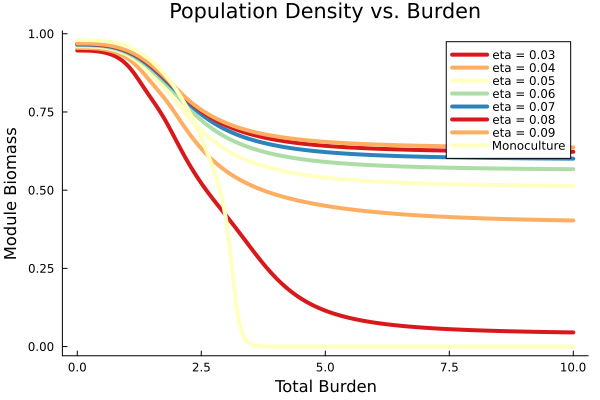

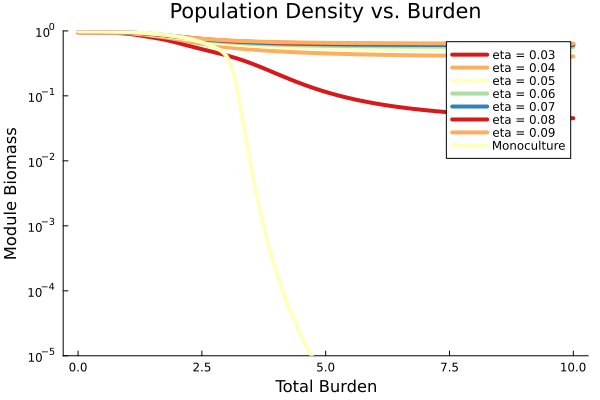

In [88]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = 3
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D
dA = avg_d
dB = avg_d
transfer_rates = transfer_rates

time = simulation_time # simulated time IN HOURS
dP = 0.5 # maximum growth rate per hour (non-dimensionalization term)
tspan_end = time * dP

total_burden_range = 0:0.05:10



steady_state_solutions = Array{Float64}(undef,length(transfer_rates),length(total_burden_range))


for rate_index in range(1,length(transfer_rates))
    
    transfer_rate = transfer_rates[rate_index]
    
    for burden_index in range(1,length(total_burden_range))
        
        symmetrical_burden = total_burden_range[burden_index]/2
        
        # Initial conditions and parameter values

        # u = [v00,v10, v01, v11]
        u0 = [0.0,1e-3,1e-3,0.0000] # Initial values for S0, S1, S2, S3

        # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
        p = [  symmetrical_burden,symmetrical_burden,n,umax,G,r,D,transfer_rate,transfer_rate,dA,dB] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB

        # Time span for integration
        tspan = (0.0, tspan_end)  # Start and end times for integration

        # Define the ODE problem
        prob = ODEProblem(DDOL_2modules, u0, tspan, p)

        # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
        solver = Tsit5()

        # Solve the ODE problem
        sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

        module_A = sol[2, :]/r + sol[4, :]/r
        module_B = sol[3, :]/r + sol[4, :]/r


        module_A_SS = max(0,last(module_A))
        module_B_SS = max(0,last(module_B))
        geometric_average_SS = (module_A_SS * module_B_SS) ^ 0.5


        steady_state_solutions[rate_index,burden_index] = geometric_average_SS
    end
end


monoculture_SS = Float64[]

for total_burden in total_burden_range
    # Initial conditions and parameter values


    # u = [v00,v10, v01, v11]
    u0 = [2e-3] # Initial values for S0, S1, S2, S3

    # p = burden,n,umax,G,r,D 
    p = [  total_burden,n,umax,G,r,D] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(monoculture_with_dual_selection, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    mono = sol[1, :]/r

    mono_SS = max(0,last(mono))

    push!(monoculture_SS, mono_SS)
end

# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_5, linewidth=4)

comparison_plot = plot()
xlabel!("Total Burden")
ylabel!("Module Biomass")
title!("Population Density vs. Burden")
plot!(legend=:topright)
plot!(grid=:false)

for rate_index in range(1,length(transfer_rates))
    
    transfer_rate = transfer_rates[rate_index]
    
    plot!(total_burden_range, steady_state_solutions[rate_index,:],label="eta = $transfer_rate")

end

plot!(total_burden_range, monoculture_SS, label="Monoculture")

display(comparison_plot)

#savefig(comparison_plot,"densityVSburden.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

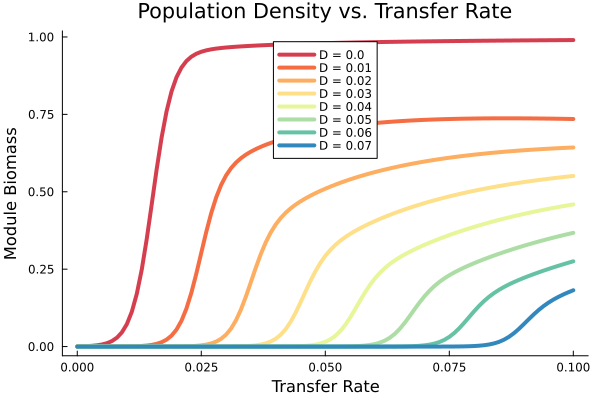

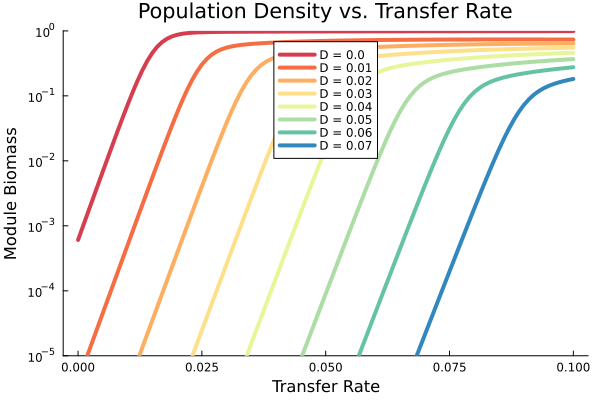

In [85]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = 3
umax = avg_umax
G = avg_G
r = avg_r

dA = avg_d
dB = avg_d
transfer_rate_range = 0:0.001:0.1

dilution_rates = dilution_rates

simulation_time = 1000

time = simulation_time # simulated time IN HOURS
dP = 0.5 # maximum growth rate per hour (non-dimensionalization term)
tspan_end = time * dP

total_burden = 100



steady_state_solutions = Array{Float64}(undef,length(dilution_rates),length(transfer_rate_range))


for rate_index in range(1,length(dilution_rates))
    
    dilution_rate = dilution_rates[rate_index]
    
    for transfer_index in range(1,length(transfer_rate_range))
        
        transfer_rate = transfer_rate_range[transfer_index]
        symmetrical_burden = total_burden/2
        
        # Initial conditions and parameter values

        # u = [v00,v10, v01, v11]
        u0 = [0.0,1e-3,1e-3,0.0000] # Initial values for S0, S1, S2, S3

        # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
        p = [  symmetrical_burden,symmetrical_burden,n,umax,G,r,dilution_rate,transfer_rate,transfer_rate,dA,dB] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB

        # Time span for integration
        tspan = (0.0, tspan_end)  # Start and end times for integration

        # Define the ODE problem
        prob = ODEProblem(DDOL_2modules, u0, tspan, p)

        # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
        solver = Tsit5()

        # Solve the ODE problem
        sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

        module_A = sol[2, :]/r + sol[4, :]/r
        module_B = sol[3, :]/r + sol[4, :]/r


        module_A_SS = max(0,last(module_A))
        module_B_SS = max(0,last(module_B))
        geometric_average_SS = (module_A_SS * module_B_SS) ^ 0.5


        steady_state_solutions[rate_index,transfer_index] = geometric_average_SS
    end
end



# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_8, linewidth=4)

comparison_plot = plot()
xlabel!("Transfer Rate")
ylabel!("Module Biomass")
title!("Population Density vs. Transfer Rate")
plot!(legend=:top)
plot!(grid=:false)

for rate_index in range(1,length(dilution_rates))
    
    dilution_rate = dilution_rates[rate_index]
    
    plot!(transfer_rate_range, steady_state_solutions[rate_index,:],label="D = $dilution_rate")

end


display(comparison_plot)

#savefig(comparison_plot,"densityVStransfer.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

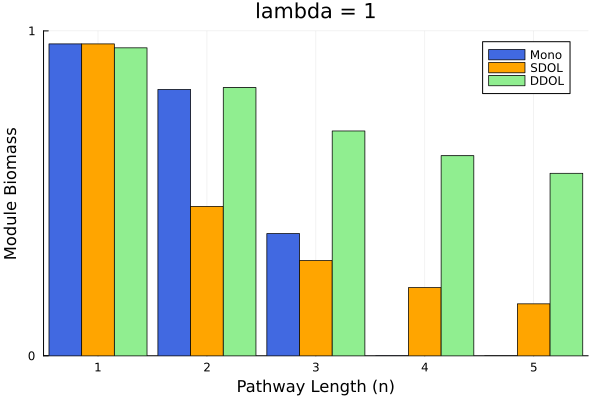

"/Users/graysonhamrick/Library/CloudStorage/OneDrive-DukeUniversity/Manuscript - Dynamic Division of Labor/Code/DDOL/Figures/Figure 3/densityVSlength.svg"

In [86]:
symmetrical_burden = 1

DDOL_module_biomass_values = [DDOL_1mod_calculation(symmetrical_burden),DDOL_2mod_calculation(symmetrical_burden),DDOL_3mod_calculation(symmetrical_burden),DDOL_4mod_calculation(symmetrical_burden),DDOL_5mod_calculation(symmetrical_burden)]
Mono_module_biomass_values = [monoculture_calculation(1,symmetrical_burden),monoculture_calculation(2,symmetrical_burden),monoculture_calculation(3,symmetrical_burden),monoculture_calculation(4,symmetrical_burden),monoculture_calculation(5,symmetrical_burden)]
SDOL_module_biomass_values = [SDOL_calculation(1,symmetrical_burden),SDOL_calculation(2,symmetrical_burden),SDOL_calculation(3,symmetrical_burden),SDOL_calculation(4,symmetrical_burden),SDOL_calculation(5,symmetrical_burden)]




ni = 1
nf = 5


n_values = collect(ni:nf)
x = n_values
bar_width = 0.3

x1 = [x[i]-bar_width for i in range(1,length(x),step=1)]
y1 = Mono_module_biomass_values

x2 = [x[i] for i in range(1,length(x),step=1)]
y2 = SDOL_module_biomass_values

x3 = [x[i]+bar_width for i in range(1,length(x),step=1)]
y3 = DDOL_module_biomass_values

#str = [round(y[i],digits=2) for i in range(1,length(y),step=1)]

comparison_bar = bar(x1,y1,
    label = "Mono",
        yaxis=([0,1]),
        ylim=([0,1]),
        linewidth = 0.75,
        bar_width = bar_width,
        c="royal blue",
        title = "lambda = $symmetrical_burden",
        xaxis=([ni-0.5,nf+0.5]),
        xlim=([1,9]),
        xlabel = "Pathway Length ("*"n"*")",
        ylabel = "Module Biomass",
        yticks = [0,1],
        xticks = (ni:1:nf),
        legend = :topright,
    )
    
comparison_bar = bar!(x2,y2,
    label = "SDOL",
        linewidth = 0.75,
        bar_width = bar_width,
        c="orange",
        
)

comparison_bar = bar!(x3,y3,
    label = "DDOL",
        linewidth = 0.75,
        bar_width = bar_width,
        c="light green",
        
)
;

display(comparison_bar)

#savefig(comparison_bar,"densityVSlength.svg")